In [101]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [102]:
df = pd.read_csv('AirlinePassengerSatisfaction-test.csv')

# Data Scaling & Pembuatan Subset

In [103]:
# Atribut Yang Akan Dilatih
df_subset = df[["Age", "Flight Distance"]]
df_class = df["Class"]

# Melakukan Scaling Data
ss = StandardScaler()
x_scaled = ss.fit_transform(df_subset)

# K-Means Clustering

In [104]:
# Membuat Objek dari K-Means dengan jumlah cluster = 3
model = KMeans(n_clusters=3, random_state = 0)

# Melakukan fit terhadap model
model.fit(x_scaled)

# Menentukan label untuk cluster
labels = model.labels_

print(labels)

[1 0 2 ... 2 2 1]


# Evaluasi Hasil Pemodelan

In [105]:
# Membuat dataframe dengan label dan Inflight Service sebagai kolom
df_kmeans = pd.DataFrame({'labels':labels, 'Class':df_class})

# Membuat crosstab : ct
ct = pd.crosstab(df_kmeans["labels"], df_kmeans["Class"])

print(ct)

Class   Business   Eco  Eco Plus
labels                          
0           5445   546       105
1           3930  4968       869
2           3120  6050       943


# Menampilkan Centroid dari model yang dibuat

In [106]:
# Mengambil semua baris pada kolom tertentu
xs = df_subset.iloc[:, 0]
ys = df_subset.iloc[:, 1]

# Menampung kordinat dari tiap centroid
centroids = model.cluster_centers_

centroids_x = centroids[:, 0]
centroids_y = centroids[:, 1]

# Visualisasi Cluster

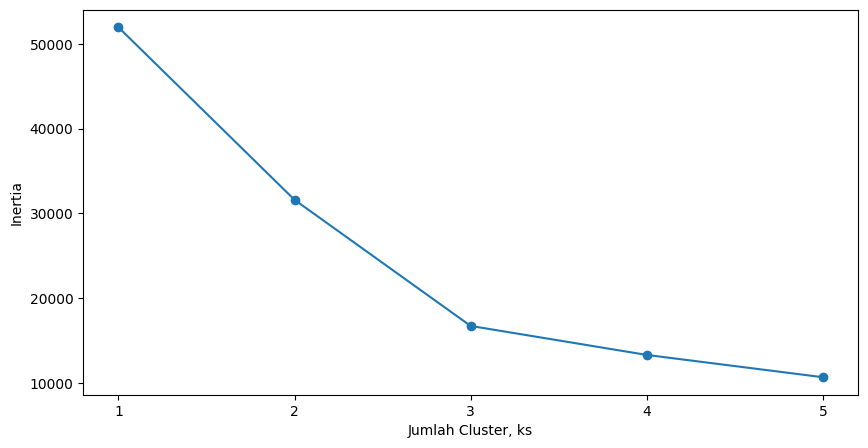

In [108]:
# Menentukan jumlah cluster (Elbow Method)
ks = range(1,6)
inertias = []
for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(x_scaled)
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.figure(figsize=(10,5))
plt.plot(ks, inertias, '-o')
plt.xlabel('Jumlah Cluster, ks')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.show()